<a href="https://colab.research.google.com/github/linkvarun/Jupyter_Notebook/blob/master/Keras_Simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf.Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:



*   Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
*   Supports both convolutional networks and recurrent networks, as well as combinations of the two.
*   Runs seamlessly on CPU and GPU.




## Keras backends

What is a "backend"?

Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.

At this time, Keras has three backend implementations available: **the TensorFlow backend, the Theano backend, and the CNTK backend**.

TensorFlow is an open-source symbolic tensor manipulation framework developed by Google.

Theano is an open-source symbolic tensor manipulation framework developed by LISA Lab at Université de Montréal. ( No further development on this framework)

CNTK is an open-source toolkit for deep learning developed by Microsoft.

In [ ]:
import tensorflow as tf

In [ ]:
foo = [-10, -5, 0.0, 5, 10]
tf.keras.activations.relu(foo).numpy()

array([ 0.,  0.,  0.,  5., 10.], dtype=float32)

In [ ]:
tf.keras.activations.swish(foo)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-4.5397869e-04, -3.3464253e-02,  0.0000000e+00,  4.9665360e+00,
        9.9995461e+00], dtype=float32)>

## Layers
The first class you need to know is Layer. Pretty much everything in Keras derives from it.

A Layer encapsulates a state (weights) and some computation (defined in the call method).

In [ ]:
tf.keras.layers.Layer(
    trainable=True, name=None, dtype=None, dynamic=False)

A layer is a class implementing common neural networks operations, such as convolution, batch norm, etc. These operations require managing weights, losses, updates, and inter-layer connectivity.

Users will just instantiate a layer and then treat it as a callable.

We recommend that descendants of Layer implement the following methods:

**__init__()**: Save configuration in member variables

**build()**: Called once from __call__, when we know the shapes of inputs and dtype. Should have the calls to add_weight(), and then call the super's build() (which sets self.built = True, which is nice in case the user wants to call build() manually before the first __call__).

**call()**: Called in __call__ after making sure build() has been called once. Should actually perform the logic of applying the layer to the input tensors (which should be passed in as the first argument).

In [ ]:
from tensorflow.keras.layers import Layer

class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32, input_dim=32): # constructor
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer() # weight's random normal intialization
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer() # bias intialized with Zero
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

### Model
The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the **Sequential model**, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

Here's an example of a sequential model

In [ ]:
from tensorflow.keras import Sequential

model = Sequential()

## Built-in layers

Keras provides you with a [wide range of built-in layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/), so that you don't have to implement your own layers all the time.
- Dense layers
- Convolution layers
- Transposed convolutions
- Separateable convolutions
- Average and max pooling
- Global average and max pooling
- LSTM, GRU (with built-in cuDNN acceleration)
- BatchNormalization
- Dropout
- Attention
- ConvLSTM2D

Stacking is done through add()

In [ ]:
from tensorflow.keras.layers import Dense
# Optionally, the first layer can receive an `input_shape` argument:
model = Sequential()
model.add(Dense(32, input_shape=(500,))) # 1st Hidden Layer
# Afterwards, we do automatic shape inference:
model.add(Dense(32))

# This is identical to the following:
model = Sequential()
model.add(Dense(32, input_dim=500))

# And to the following:
model = Sequential()
model.add(Dense(32, batch_input_shape=(None, 500)))

# Note that you can also omit the `input_shape` argument:
# In that case the model gets built the first time you call `fit` (or other
# training and evaluation methods).
model = Sequential()
model.add(Dense(32))  # layer 1
model.add(Dense(32))  # layer 2
model.compile(optimizer=optimizer, loss=loss)
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10) #training

# Note that when using this delayed-build pattern (no input shape specified),
# the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = Sequential()
model.add(Dense(32))
model.add(Dense(32))
model.weights  # returns []

# Whereas if you specify the input shape, the model gets built continuously
# as you are adding layers:
model = Sequential()
model.add(Dense(32, input_shape=(500,)))
model.add(Dense(32))
model.weights  # returns list of length 4

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling `build(batch_input_shape)`:
model = Sequential()
model.add(Dense(32))
model.add(Dense(32))
model.build((None, 500))
model.weights  # returns list of length 4

NameError: ignored

Once we build the model we configure the model's learning process with compile()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [ ]:
from tensorflow.keras.losses import mean_squared_error
y_pred = [12000, 14000, 20000]
y_true = [12800, 14250, 21000]

print(mean_squared_error(y_true, y_pred))

tf.Tensor(567500, shape=(), dtype=int32)


**optimizer**: String (name of optimizer) or optimizer instance. See tf.keras.optimizers.

**loss**: String (name of objective function), objective function or tf.keras.losses.Loss instance. See tf.keras.losses. An objective function is any callable with the signature scalar_loss = fn(y_true, y_pred). If the model has multiple outputs, you can use a different loss on each output by passing a dictionary or a list of losses. The loss value that will be minimized by the model will then be the sum of all individual losses.

**metrics**: List of metrics to be evaluated by the model during training and testing. Typically you will use metrics=['accuracy']. To specify different metrics for different outputs of a multi-output model, you could also pass a dictionary, such as metrics={'output_a': 'accuracy', 'output_b': ['accuracy', 'mse']}. You can also pass a list (len = len(outputs)) of lists of metrics such as metrics=[['accuracy'], ['accuracy', 'mse']] or metrics=['accuracy', ['accuracy', 'mse']].

**evaluate()**

Returns the loss value & metrics values for the model in test mode.

Computation is done in batches.

In [ ]:
evaluate(
    x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False
)

NameError: ignored

**fit()**

Trains the model for a fixed number of epochs (iterations on a dataset).

In [ ]:
fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_freq=1, max_queue_size=10, workers=1,
    use_multiprocessing=False, **kwargs
)

NameError: ignored

You can now iterate on your training data in batches:

In [ ]:
# dummy code
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=5, batch_size=32)

NameError: ignored

Evaluate your performance in one line:

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

NameError: ignored

Or generate predictions on new data:

In [ ]:
classes = model.predict(x_test, batch_size=128)

NameError: ignored

### Keras MNIST Neural Net example

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255

num_val_samples = 10000
x_val = x_train[-num_val_samples:]
y_val = y_train[-num_val_samples:]
x_train = x_train[:-num_val_samples]
y_train = y_train[:-num_val_samples]

# Instantiate a simple classification model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.tanh),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
# recall = tf.keras.metrics.Recall()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])
model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=10,
          batch_size=128, verbose=1)

Epoch 1/10
391/391 [==============================] - 3s 4ms/step - loss: 0.2527 - sparse_categorical_accuracy: 0.9240 - val_loss: 0.1100 - val_sparse_categorical_accuracy: 0.9666
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9699 - val_loss: 0.0906 - val_sparse_categorical_accuracy: 0.9718
Epoch 3/10
391/391 [==============================] - 2s 4ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0889 - val_sparse_categorical_accuracy: 0.9742
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0828 - val_sparse_categorical_accuracy: 0.9762
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0343 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0763 - val_sparse_categorical_accuracy: 0.9780
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 0.0293 - sparse_categorica

In [ ]:
model.evaluate(x_test.reshape(10000, 784).astype('float32') / 255, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9794


[0.09149813652038574, 0.9793999791145325]

## Building a Neural Network for Regression Task

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
petrol_cons = pd.read_csv(r'/content/petrol_consumption.csv')

In [ ]:
petrol_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


One can see that there are five columns in the dataset. The regression model will be trained on the first four columns, i.e. Petrol_tax, Average_income, Paved_Highways, & Population_Driver_License. The value for the last column i.e. Petrol_Consumption will be predicted (Y).

In [ ]:
X = petrol_cons.iloc[:, 0:4].values
y = petrol_cons.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.32525691e-01,  1.50577399e+00,  2.25854636e+00,
        -9.15791057e-01],
       [-6.28192647e-01, -1.83367022e+00,  2.12333843e-01,
        -1.12852703e+00],
       [-1.32525691e-01, -1.78897047e+00, -4.54194551e-01,
        -5.25775100e-01],
       [-1.32525691e-01, -8.78212954e-01,  8.77245103e-01,
         4.15208375e-02],
       [-6.28192647e-01,  1.27482526e+00,  1.07480487e+00,
         2.89712810e-01],
       [ 1.35447518e+00, -8.42825648e-01, -1.13743332e+00,
         5.92488356e-02],
       [-6.28192647e-01, -4.00925436e-02, -4.64436395e-01,
         8.21552752e-01],
       [-6.28192647e-01,  7.42153173e-01,  2.93282707e-02,
         2.61208055e+00],
       [-6.28192647e-01,  8.82232011e-04,  1.22196399e+00,
         1.65616824e-01],
       [ 3.63141265e-01, -2.41241442e-01,  4.54996025e-02,
        -2.42127131e-01],
       [ 1.35447518e+00,  1.07926383e+00, -9.04835665e-01,
        -1.16398303e+00],
       [-6.28192647e-01, -2.07716626e-01,  7.28199328e-01,
      

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 6,851
Trainable params: 6,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 6s 105ms/step - loss: 342004.4688 - mean_squared_error: 342004.4375 - val_loss: 402804.6250 - val_mean_squared_error: 402804.6250
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 341860.6562 - mean_squared_error: 341860.6562 - val_loss: 402657.6250 - val_mean_squared_error: 402657.6250
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 341728.0625 - mean_squared_error: 341728.0625 - val_loss: 402511.8125 - val_mean_squared_error: 402511.8125
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 341597.9062 - mean_squared_error: 341597.9062 - val_loss: 402369.8750 - val_mean_squared_error: 402369.8750
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 341475.2812 - mean_squared_error: 341475.2812 - val_loss: 402223.7500 - val_mean_squared_error: 402223.7500
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 341339.2188 - mean_squared_

In [ ]:
print(history.history)

{'loss': [342004.46875, 341860.65625, 341728.0625, 341597.90625, 341475.28125, 341339.21875, 341178.28125, 341011.6875, 340815.875, 340599.53125, 340336.0, 340023.9375, 339660.28125, 339254.5, 338737.15625, 338178.8125, 337468.875, 336690.875, 335725.71875, 334672.40625, 333260.8125, 331853.0, 330098.625, 328073.40625, 325733.5625, 323001.59375, 320048.46875, 316746.0, 312980.0, 308564.34375, 303814.40625, 298547.875, 292664.65625, 286228.78125, 279162.0625, 271297.21875, 262751.53125, 253668.4375, 243460.984375, 233262.90625, 222107.578125, 210211.53125, 197719.546875, 184922.09375, 171352.90625, 157841.734375, 144472.640625, 130644.8984375, 117468.6796875, 104102.953125, 91603.984375, 80030.0078125, 69897.1640625, 60366.55078125, 51463.1328125, 45325.47265625, 38482.08984375, 34588.76953125, 31434.208984375, 27636.763671875, 26229.267578125, 24780.01171875, 23644.17578125, 22653.69140625, 21776.298828125, 21059.591796875, 20282.54296875, 19579.396484375, 18831.423828125, 18244.625, 1

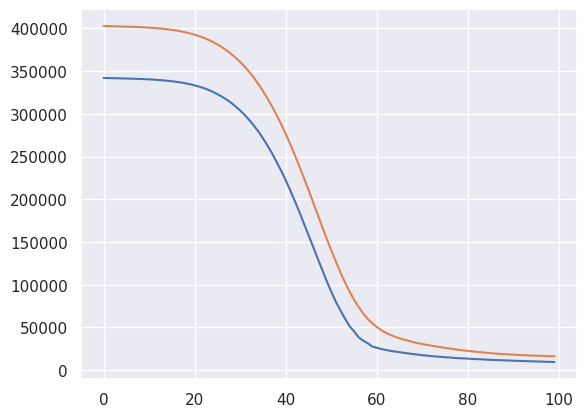

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train))) # RMSE Score

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) # RMSE Score

print (r2_score(y_train,pred_train))
print (r2_score(y_test, pred)) #R2 score

2/2 [==============================] - 0s 5ms/step
104.30398456230623
1/1 [==============================] - 0s 18ms/step
142.06735679265256
0.20544479080478606
-2.4445499682650285


## Neural Network for Classification

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price

. . buying buying price

. . maint price of the maintenance

. TECH technical characteristics

. . COMFORT comfort

. . . doors number of doors

. . . persons capacity in terms of persons to carry

. . . lug_boot the size of luggage boot

. . safety estimated safety of the car

In [ ]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv(r'/content/car_evaluation.csv', names=cols, header=None)

In [ ]:
cars.head(25)

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


<Axes: ylabel='output'>

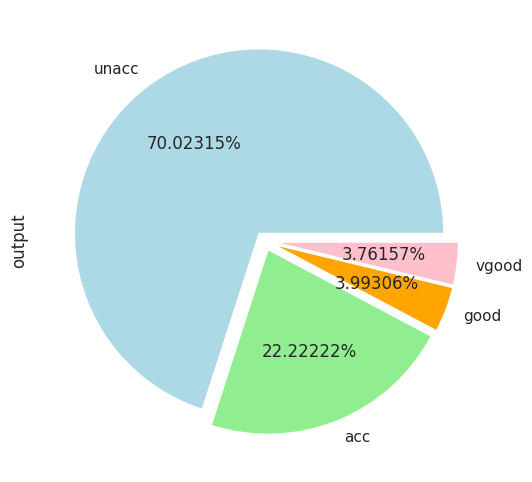

In [ ]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size


cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

All the columns in our dataset are categorical. Deep learning is based on statistical algorithms and statistical algorithms work with numbers. Therefore, we need to convert the categorical information into numeric columns. There are various approaches to do that but one of the most common approach is one-hot encoding.

In [ ]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

In [ ]:
X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)

labels.tail()

,condition_acc,condition_good,condition_unacc,condition_vgood
1723,0,1,0,0
1724,0,0,0,1
1725,0,0,1,0
1726,0,1,0,0
1727,0,0,0,1


In [ ]:
X

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [ ]:
y = labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='tanh')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_4 (Dense)             (None, 15)                330       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
35/35 [==============================] - 2s 9ms/step - loss: 1.1686 - acc: 0.5421 - val_loss: 1.0571 - val_acc: 0.6534
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.8845 - acc: 0.7276 - val_loss: 0.8729 - val_acc: 0.6931
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7269 - acc: 0.7412 - val_loss: 0.7622 - val_acc: 0.7112
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6262 - acc: 0.7674 - val_loss: 0.6782 - val_acc: 0.7473
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5508 - acc: 0.7910 - val_loss: 0.6100 - val_acc: 0.7690
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4885 - acc: 0.8072 - val_loss: 0.5510 - val_acc: 0.8051
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.4334 - acc: 0.8398 - val_loss: 0.5061 - val_acc: 0.8159
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3895 - acc: 0.86

In [ ]:
print(history.history)

{'loss': [1.16862154006958, 0.8844555616378784, 0.7269493341445923, 0.6261920928955078, 0.5508479475975037, 0.48853129148483276, 0.43339043855667114, 0.38954368233680725, 0.35656416416168213, 0.3307288885116577, 0.3102937936782837, 0.2931804358959198, 0.2790702283382416, 0.26777365803718567, 0.25586700439453125, 0.246072456240654, 0.23564256727695465, 0.22641654312610626, 0.21795234084129333, 0.20989692211151123, 0.20390541851520538, 0.19763042032718658, 0.18925146758556366, 0.1833716481924057, 0.18047402799129486, 0.1718745231628418, 0.1669951230287552, 0.16166183352470398, 0.15821458399295807, 0.15240547060966492, 0.1475915163755417, 0.14445631206035614, 0.14030951261520386, 0.13543517887592316, 0.1327933669090271, 0.12897536158561707, 0.12453728169202805, 0.1218329668045044, 0.11809932440519333, 0.11554154008626938, 0.11174900084733963, 0.10858078300952911, 0.10586288571357727, 0.10317559540271759, 0.10000436007976532, 0.0972801223397255, 0.09567608684301376, 0.0925057902932167, 0.0

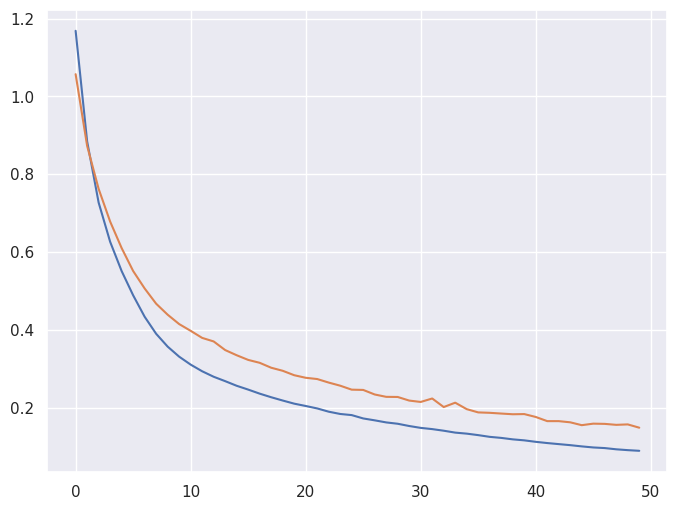

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])

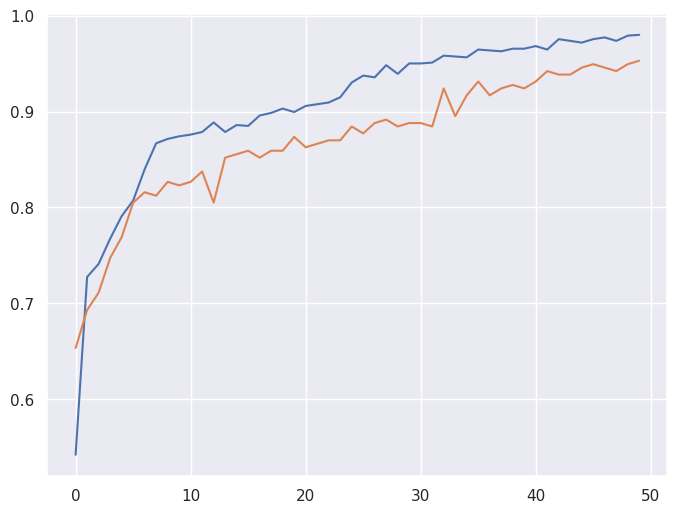

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 4ms/step - loss: 0.1383 - acc: 0.9595
Test Accuracy: 0.9595375657081604


In [ ]:
model.save('classification_model')

In [ ]:
! ls

car_evaluation.csv  classification_model  petrol_consumption.csv  sample_data


In [ ]:
reloaded_model = tf.keras.models.load_model('classification_model')

In [ ]:
score = reloaded_model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 5ms/step - loss: 0.1383 - acc: 0.9595
Test Accuracy: 0.9595375657081604


In [ ]:
print (reloaded_model)

In [ ]:
for layer in reloaded_model.layers:
    print(layer.get_config())
    print(layer.get_weights())

{'batch_input_shape': (None, 21), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_2'}
[]
{'name': 'dense_4', 'trainable': True, 'dtype': 'float32', 'units': 15, 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 9.97497439e-02,  4.13118660e-01, -2.65152186e-01,
         4.71384466e-01, -2.53294319e-01, -7.40927011e-02,
         3.61232013e-01, -4.47996557e-01, -2.67167628e-01,
         1.43751368e-01, -1.88543469e-01,  9.71070051e-01,
        -1.88289106e-01,  7.88927972e-02,  1.95060223e-01],
       [ 9.85411741e-03,  8.78757611e-03, -2.59334564e-01,
        -4.28427219e-01,  4.30202693e-01, -1.80715501e-01,
        -6.79595619e-02, -1.46693707e-01, -5.29263541e-02,
        -1.64432779e-01,  1.

## Saving the Model

In [ ]:
# Create a simple model
model = tf.keras.Sequential([
  layers.Dense(10, activation='relu', input_shape=(32,)),
  layers.Dense(10)
])
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(data, labels, batch_size=32, epochs=5)


# Save entire model to a HDF5 file
model.save('my_model.h5')

# Recreate the exact same model, including weights and optimizer.
model = tf.keras.models.load_model('my_model.h5')

NameError: ignored

Remember that TensorFlow and Keras don't represent a single workflow. It's a spectrum of workflows, each with its own trade-off between usability and flexibility. For instance, you've noticed that it's much easier to use fit than to write a custom training loop, but fit doesn't give you the same level of granular control for research use cases.

So use the right tool for the job!

A core principle of Keras is "progressive disclosure of complexity": it's easy to get started, and you can gradually dive into workflows where you write more and more logic from scratch, providing you with complete control.

This applies to both model definition, and model training.